# Análise exploratória de dados

In [96]:
from IPython.display import display, Markdown
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

palette = sns.color_palette("pastel")
# sns.set_style("whitegrid")
sns.set_theme(style="ticks")
sns.set_palette(sns.color_palette(palette))

## 1. Leitura do conjunto de dados

In [8]:
df = pd.read_csv('../data/raw/data.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## 2. Descrição dos dados

**Tips** é um conjunto de dados coletado por um garçom que registrou informações sobre cada gorjeta que recebeu durante alguns meses trabalhando em um restaurante. Os dados foram relatados numa coleção de estudos de caso para estatísticas empresariais (Bryant & Smith 1995) e são usado principalmente para fins de estudos e aprendizado de máquina. 

Ao todo ele registrou 244 gorjetas, tendo a variável ```tip``` como dependente e as outras utilizadas como preditórias. 

## 2.1. Dicionário de dados

In [10]:
dicionario = pd.read_csv('../data/external/dictionary.csv')
dicionario

,variavel,descricao,tipo,subtipo
0,total_bill,Valor da conta em dólares,quantitativa,continua
1,tip,Valor da gorjeta em dólares,quantitativa,continua
2,sex,Sexo dos clientes,qualitativa,nominal
3,smoker,Se os clientes eram fumantes ou não,qualitativa,nominal
4,day,Dia da semana,qualitativa,ordinal
5,time,Período do dia,qualitativa,ordinal
6,size,Quantidade de pessoas na mesa,quantitativa,discreta


* São 7 variáveis, com 2 quantitativas contínuas, 2 qualitativas nominais, 2 qualitativas ordinais e 1 quantitativa discreta.

## 3. Perguntas de partida e hipóteses

* Existem dados faltantes, se sim quantos e em quais variáveis?
* Qual a distribuição dos dados (variável por variável)?
* Qual é a relação entre o valor da conta final da conta e o valor da gorjeta?
* Existem correlações entre o dia e o horário da refeição com o valor da gorjeta?
* É possível relacionar o sexo e o fato do cliente ser fumante ou não com o valor da gorjeta?

### Existem dados faltantes, se sim quantos e em quais variáveis?

In [15]:
dados_faltantes = df.isnull().sum()
dados_faltantes

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

A partir da informação dada pela saída do código acima, é possível perceber que não existem dados faltantes na tabela.

### Qual a distribuição dos dados (variável por variável)?

Iniciaremos com as estatísticas descritivas e posteriormente com visualizações das distribuições.

In [16]:
df.describe(include='all')

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


* A maioria das gorjetas é dada pelo sexo **Masculino**;
* A maioria dos clientes não eram fumantes ```(61%)```;
* O dia com maior frequência de recebimento de gorjetas foi aos **Sábados**, e o período no dia foi durante o **Jantar**;
* O número **máximo** de pessoas acomodadas à mesa é de 6;
* O valor médio recebido pelas gorjetas é de ```U$ 2.99```;
* O valor médio da conta é de ```U$ 19.79```, variando entre o mínimo de ```U$ 3.07``` a um máximo de ```U$ 50.81```;
* O maior valor recebido de uma gorjeta foi de ```U$ 10```.

### Distribuição das variáveis qualitativas

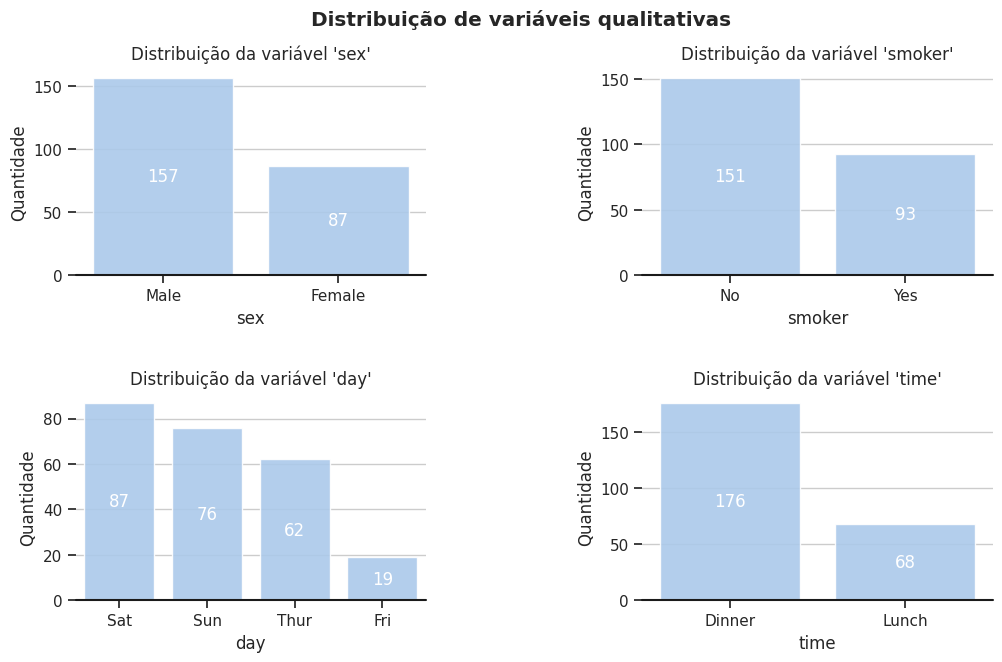

In [97]:
fig, axes = plt.subplots(2, 2, figsize=(11,7))
plt.tight_layout(pad=4, w_pad=10, h_pad=5)
fig.suptitle('Distribuição de variáveis qualitativas', fontweight='bold')
for i, variavel in enumerate(dicionario.query("tipo == 'qualitativa'").variavel.to_list()):
    order = df[variavel].value_counts().index
    ax = sns.countplot(
        data=df,
        x=variavel,
        ax=axes.flatten()[i],
        color=palette[0],
        alpha=0.9,
        order=order
    )
    ax.bar_label(
        ax.containers[0],
        fmt='%.0f',
        label_type='center',
        color='white'
    )
    ax.set(frame_on=False)
    ax.axhline(0, color="k", clip_on=False)
    ax.set_title(f"Distribuição da variável '{variavel}'")
    ax.set_ylabel('Quantidade')
    ax.grid(axis='y', linestyle='-')
plt.show()

A partir das visualizações acima podemos dizer que:

* A maioria dos clientes recebidos no restaturante são **Homens**, sendo mais da metade em comparação com as mulheres;
* Apenas 39% dos clientes atendidos eam fumantes;
* O dia com maior frequência de clientes no restaurente é aos **Sábados**, e o com menor frequencia é as **Sextas-Feiras**,O dia com maior frequência de clientes no restaurente é aos **Sábados**, e o com menor frequencia é as **Sextas-Feiras**;
* A maior parte das gorjetas foram recebidas no período do jantar.

### Distribuição das variáveis quantitativas

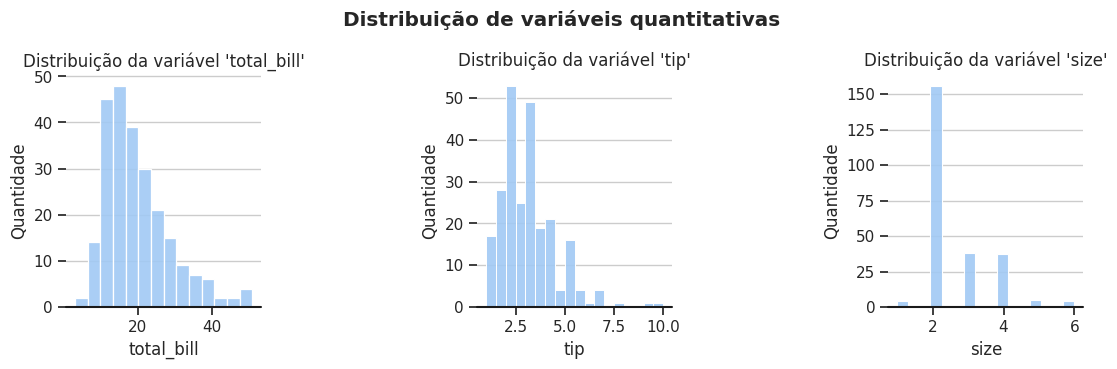

In [94]:
fig, axes = plt.subplots(1, 3, figsize=(12,4))
plt.tight_layout(pad=4, w_pad=10, h_pad=5)
fig.suptitle('Distribuição de variáveis quantitativas', fontweight='bold')
for i, variavel in enumerate(dicionario.query("tipo == 'quantitativa'").variavel.to_list()):
    ax = sns.histplot(
        data=df,
        x=variavel,
        ax=axes.flatten()[i],
        color=palette[0],
        alpha=0.9,
    )
    ax.set(frame_on=False)
    ax.axhline(0, color="k", clip_on=False)
    ax.set_title(f"Distribuição da variável '{variavel}'")
    plt.xlabel(variavel)
    ax.set_ylabel('Quantidade')
    ax.grid(axis='y', linestyle='-')

plt.show()
  

A partir das visualizações acima podemos dizer que:

* A maioria do valor final das contas pagas pelos clientes ficam entre ```U$ 20``` e ```U$ 10```;
* O valor recebido das gorjetas varia bastante, se concentrando entre ```U$ 2.50``` e ```U$ 3.50```;
* Mais da metade dos clientes foram atendidos em mesas com 2 pessoas.

### Existem correlações entre o dia e o período da refeição com o valor da gorjeta?

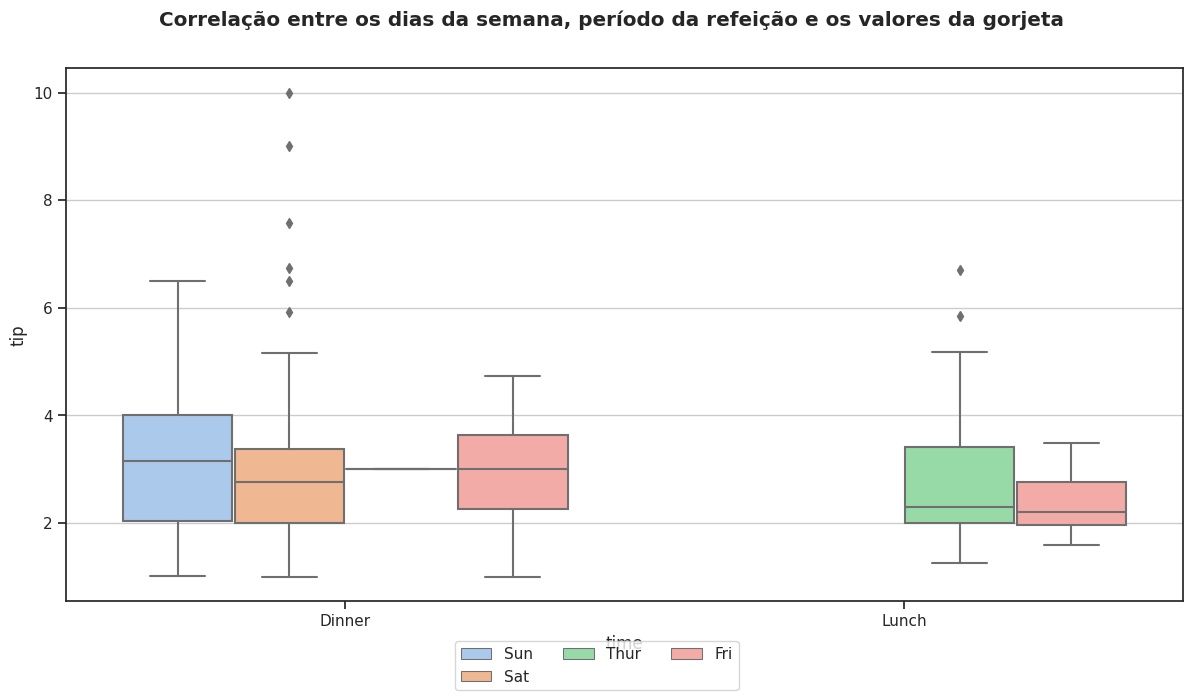

In [99]:
fig, ax = plt.subplots(figsize=(13, 7))
plt.tight_layout(pad=4, w_pad=2, h_pad=5)
fig.suptitle('Correlação entre os dias da semana, período da refeição e os valores da gorjeta', fontweight='bold')
for i, variavel in enumerate(dicionario.query("tipo == 'quantitativa' and variavel == 'tip'").variavel.to_list()):
    ax = sns.boxplot(
        x="time", 
        y=variavel, 
        hue="day", 
        data=df, 
        ax=ax
    )
    handles, labels = plt.gca().get_legend_handles_labels()
    ax.grid(axis='y', linestyle='-')
    ax.legend([],[], frameon=False)
# sns.despine(offset=2, trim=True)
fig.legend(handles, labels, loc='lower center', ncol=3)
plt.show()

* 
* 
* 

### É possível relacionar o sexo e o fato do cliente ser fumante ou não com o valor da gorjeta?

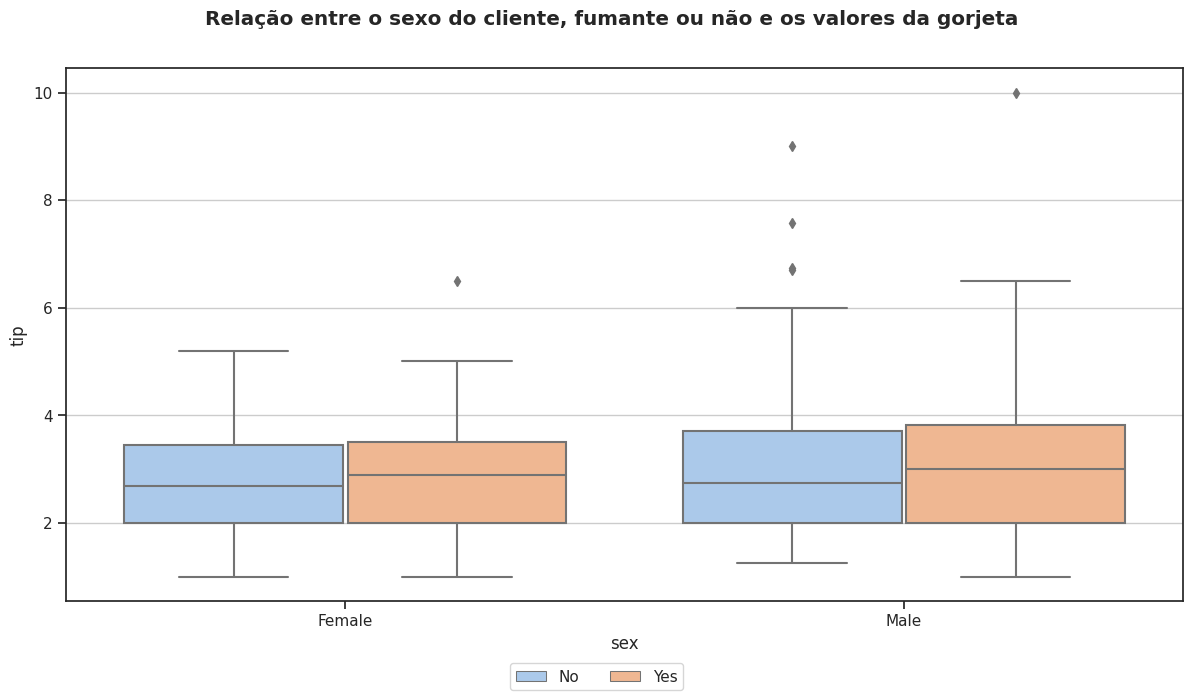

In [100]:
fig, ax = plt.subplots(figsize=(13, 7))
plt.tight_layout(pad=4, w_pad=2, h_pad=5)
fig.suptitle('Relação entre o sexo do cliente, fumante ou não e os valores da gorjeta', fontweight='bold')
for i, variavel in enumerate(dicionario.query("tipo == 'quantitativa' and variavel == 'tip'").variavel.to_list()):
    ax = sns.boxplot(
        x="sex", 
        y=variavel, 
        hue="smoker", 
        data=df, 
        ax=ax
    )
    handles, labels = plt.gca().get_legend_handles_labels()
    ax.grid(axis='y', linestyle='-')
    ax.legend([],[], frameon=False)
# sns.despine(offset=2, trim=True)
fig.legend(handles, labels, loc='lower center', ncol=3)
plt.show()

* 
* 
* 

### Quais relações são possíveis identificar entre o sexo do cliente, o tamanho da mesa e os valores finais da conta e da gorjeta?

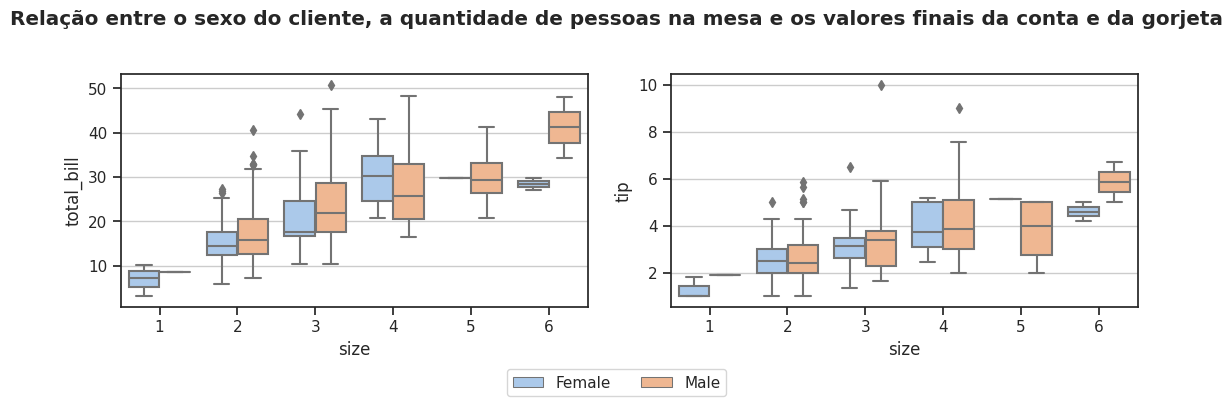

In [101]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))
plt.tight_layout(pad=4, w_pad=2, h_pad=5)
fig.suptitle('Relação entre o sexo do cliente, a quantidade de pessoas na mesa e os valores finais da conta e da gorjeta', fontweight='bold')
for i, variavel in enumerate(dicionario.query("tipo == 'quantitativa' and variavel != 'size'").variavel.to_list()):
    ax = sns.boxplot(
        x="size", 
        y=variavel, 
        hue="sex", 
        data=df, 
        ax=axes.flatten()[i]
    )
    handles, labels = plt.gca().get_legend_handles_labels()
    ax.grid(axis='y', linestyle='-')
    ax.legend([],[], frameon=False)
# sns.despine(offset=2, trim=True)
fig.legend(handles, labels, loc='lower center', ncol=3)
plt.show()

* 
* 
* 

### Existem correlações entre as variáveis?

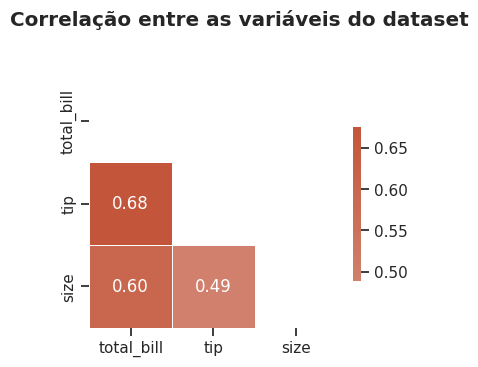

In [91]:
corr = df.corr(numeric_only=True)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

plt.figure(figsize=(4,4))
# Draw the heatmap with the mask and correct aspect ratio
ax = sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    center=0,
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": .5},
    annot=True, 
    fmt=".2f"
)
ax.grid(False)

plt.suptitle(f"Correlação entre as variáveis do dataset", fontweight='bold')
plt.show()

/home/nicole/cursoavanti-dados/avanti-bootcamp-cdd/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


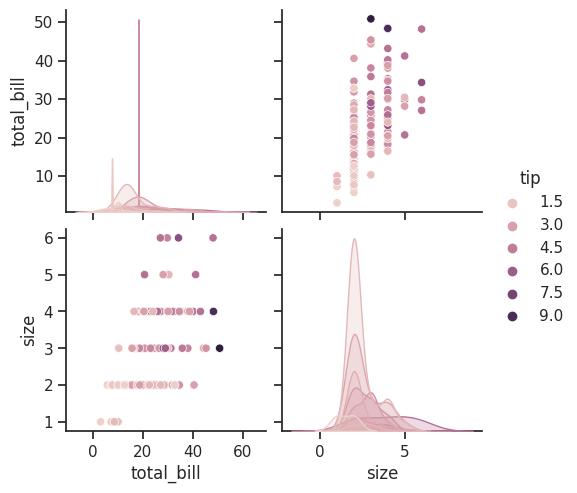

In [92]:
sns.pairplot(df, hue="tip")
plt.show()

## 4. *Insights*